# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as smj
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.shape
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [6]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger STD than GPA because it's range of values (220-800) is are higher and larger than those of GPA (2.26-4.00).

#### Question 4. Drop data points with missing data


In [7]:
df_raw_dropna = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [8]:
df_raw_dropna.shape

(397, 4)

In [9]:
df_raw[df_raw['gre'].isnull()| df_raw['gpa'].isnull()|df_raw['prestige'].isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


Answer: I can tell that the correct data was dropped first filtering df_raw to get a dataframe with observations containing missing data. That shows me that there are 3 observations missing at least one datapoint. Then I compared the shapes of df_raw and df_raw_dropna. df_raw_dropna 397 observations, while df_raw has 400--a difference of 3--the same number as the filtered drop_na dataframe. 

#### Question 6. Create box plots for GRE and GPA

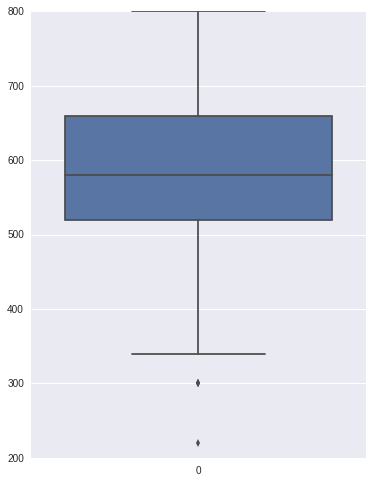

In [10]:
#boxplot 1
# GRE boxplot
fig = plt.figure(1, figsize=(6,8))
sns.boxplot(data=df_raw_dropna['gre'])

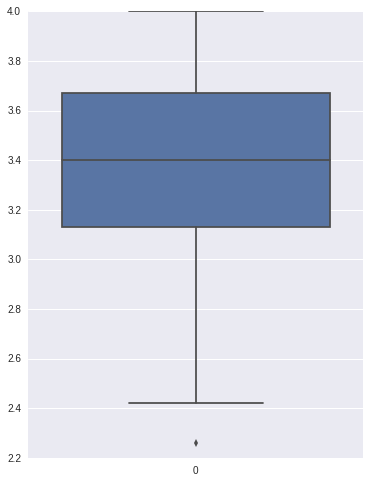

In [11]:
#boxplot 2 
# GPA boxplot
fig = plt.figure(1, figsize=(6,8))
sns.boxplot(data=df_raw_dropna['gpa'])

#### Question 7. What do this plots show?

Answer: The box plots show the min and max for each Series as well as the mean, each quartile, the interquartile range, and outliers. They also show that the data in both GRE and GPA is skewed negatively.

#### Question 8. Describe each distribution 

Skew:  -0.216888932969
Kurtosis:  -0.563569899522


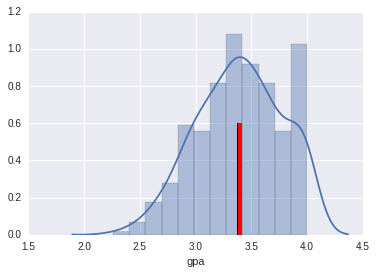

In [34]:
# plot the distribution of each variable 
# GPA distribution
sns.distplot(df_raw_dropna['gpa'])

# Plot black line at mean
plt.vlines(df_raw_dropna['gpa'].mean(), ymin=0, ymax=.60, linewidth=4.0)

# Plot red line at median
plt.vlines(df_raw_dropna['gpa'].median(), ymin=0, ymax=.60, linewidth=4.0, color="red");
print "Skew: ", df_raw_dropna['gpa'].skew()
print "Kurtosis: ", df_raw_dropna['gpa'].kurt()

Skew:  -0.146046988216
Kurtosis:  -0.332864354651


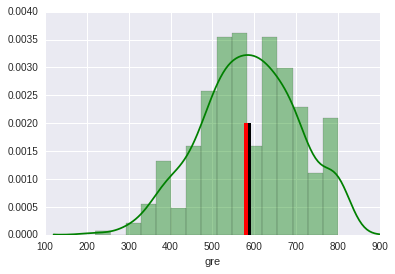

In [31]:
# GRE distribution
sns.distplot(df_raw_dropna['gre'], color='green', kde=True)

# Plot black line at mean
plt.vlines(df_raw_dropna['gre'].mean(), ymin=0, ymax=.0020, linewidth=4.0)

# Plot red line at median
plt.vlines(df_raw_dropna['gre'].median(), ymin=0, ymax=.0020, linewidth=4.0, color="red");
print "Skew: ", df_raw_dropna['gre'].skew()
print "Kurtosis: ", df_raw_dropna['gre'].kurt()

Skew:  0.0865055528971
Kurtosis:  -0.90103795489


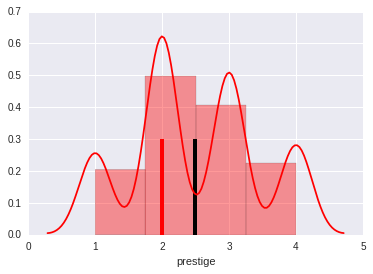

In [32]:
# Prestige distribution
sns.distplot(df_raw_dropna['prestige'], color='red', bins=4)

# Plot black line at mean
plt.vlines(df_raw_dropna['prestige'].mean(), ymin=0, ymax=.30, linewidth=4.0)

# Plot red line at median
plt.vlines(df_raw_dropna['prestige'].median(), ymin=0, ymax=.30, linewidth=4.0, color="red");
print "Skew: ", df_raw_dropna['prestige'].skew()
print "Kurtosis: ", df_raw_dropna['prestige'].kurt()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes. GPA and GRE are skewed moderately higher and Prestige is skewed slightly lower than a normal distribution, while the kurtosis for each variable is less than 1. Each of the variables has an acceptably close fit to a normal distribution. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No. A log transformation could be performed in order to lessen the skew of the data and improve the accuracy of the results, but without further exploration of the data I'm not convinced it needs to be done.

#### Question 11. Which of our variables are potentially colinear? 

In [15]:
# create a correlation matrix for the data
df_raw_dropna.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GPA and GRE have a moderately positive correlation, while prestige and admit have a weak negative correlation.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1) Refine the Data
    - Decide on how to deal with missing data.
2) Create a Two-Tail Hypothesis Test
    - Null Hypothesis
    - Alternate Hypothesis
3) Build a Model
    - Perform exploratory analysis on how 'prestige' relates to 'admit' using statsmodels
    - Interpret the fit of the model by looking at the p-value, r-squared, t-value, and coefficients' stats.


#### Question 14. What is your hypothesis? 

Answer: Students from higher prestige undergraduate programs are more likely to be admitted to UCLA's graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

1. Impute the missing data with the mean.
2. Impute the missing data with the mode.
3. Impute the missing data with predicted score from a regression equation.

#### 2. Bonus: Log transform the skewed data

In [16]:
df_raw_dropna_log = df_raw_dropna.copy()

df_raw_dropna_log[['gre', 'gpa']] = df_raw_dropna[['gre', 'gpa']].apply(np.log10)

#### 3. Advanced: Impute missing data

In [17]:
df_raw_fillna = pd.DataFrame()

df_raw_fillna['gre'] = df_raw['gre'].fillna(df_raw['gre'].median())
df_raw_fillna['gpa'] = df_raw['gpa'].fillna(df_raw['gpa'].median())
df_raw_fillna['prestige'] = df_raw['prestige'].fillna(df_raw['prestige'].median())

In [18]:
df_raw_fillna[df_raw['gre'].isnull()| df_raw['gpa'].isnull()|df_raw['prestige'].isnull()]

,gre,gpa,prestige
187,580.0,3.395,2.0
212,580.0,2.870,2.0
236,660.0,3.395,2.0
